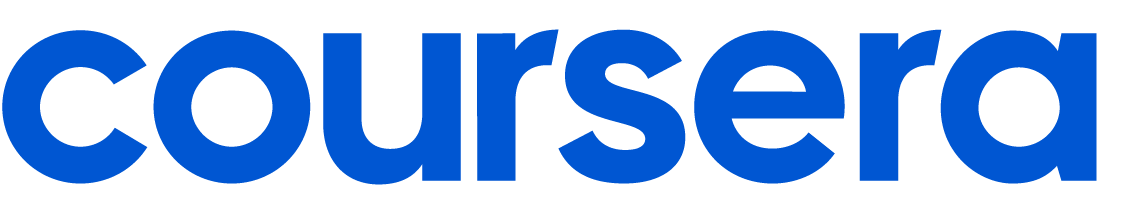

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [459]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [460]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [461]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [462]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [463]:
train_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [464]:
test_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64

## Concatenate the two dataset to visualization

In [465]:
sns.set_style("whitegrid")

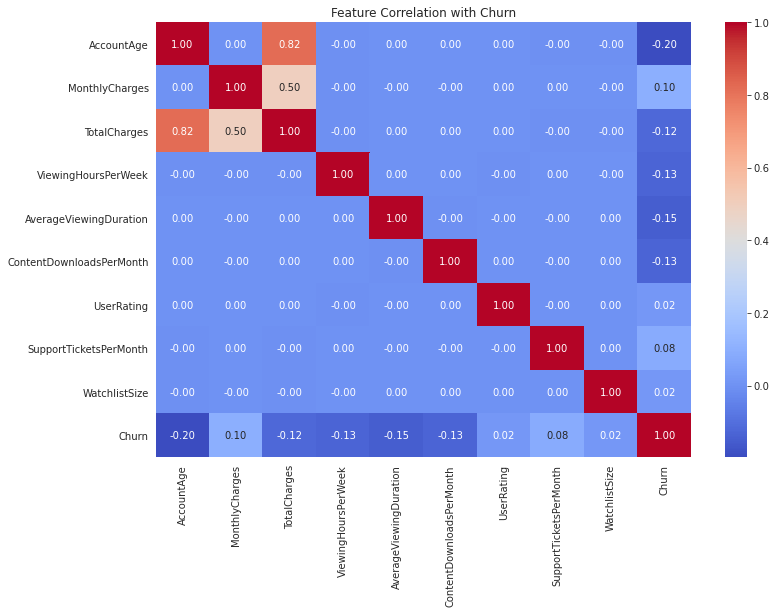

In [466]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()

In [467]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [468]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                104480 non-null  f

In [469]:
train_df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


In [470]:
print(train_df['UserRating'].max())
print(train_df['UserRating'].mean())
print(train_df['UserRating'].min())

4.999989412151972
3.0027127494687207
1.0000073778257992


In [471]:
train_df['UserRating'] = train_df['UserRating'].round(1)
test_df['UserRating'] = test_df['UserRating'].round(1)


In [472]:
print(train_df['UserRating'].max())
print(train_df['UserRating'].mean())
print(train_df['UserRating'].min())

5.0
3.002766349313191
1.0


In [473]:
train_df['AccountAge'].max()

119

In [474]:
train_df['AccountAge'].min()

1

In [475]:
train_df['AccountAge'].mean()

60.083757542444836

In [476]:
train_df['AccountAge'].value_counts()

93     2168
95     2157
19     2148
74     2143
99     2141
       ... 
5      1967
20     1957
10     1953
107    1942
108    1931
Name: AccountAge, Length: 119, dtype: int64

In [477]:
print('Max',test_df['AccountAge'].max())
print('Min',test_df['AccountAge'].min())
print('Mean',test_df['AccountAge'].mean())

Max 119
Min 1
Mean 60.06469180704441


In [478]:
test_df['AccountAge'].value_counts()

55     969
53     941
43     935
60     931
67     929
      ... 
76     814
93     813
13     813
41     808
116    793
Name: AccountAge, Length: 119, dtype: int64

In [479]:
bins = [1, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
labels = ['Less than a year', 'More than 1 year', 'More than 2 years', 
          'More than 3 years', 'More than 4 years', 'More than 5 years', 
          'More than 6 years', 'More than 7 years', 'More than 8 years', 
          'More than 9 years']

# Apply pd.cut to create the User_account_age column
train_df['User_account_age'] = pd.cut(train_df['AccountAge'], bins=bins, labels=labels, right=False)
train_df['User_account_age'] = train_df['User_account_age'].astype('object')

# Display the DataFrame to check the result
print(train_df[['AccountAge', 'User_account_age']].head())

   AccountAge   User_account_age
0          20   More than 1 year
1          57  More than 4 years
2          73  More than 6 years
3          32  More than 2 years
4          57  More than 4 years


In [480]:
bins = [1, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
labels = ['Less than a year', 'More than 1 year', 'More than 2 years', 
          'More than 3 years', 'More than 4 years', 'More than 5 years', 
          'More than 6 years', 'More than 7 years', 'More than 8 years', 
          'More than 9 years']

# Apply pd.cut to create the User_account_age column
test_df['User_account_age'] = pd.cut(test_df['AccountAge'], bins=bins, labels=labels, right=False)
test_df['User_account_age'] = test_df['User_account_age'].astype('object')

# Display the DataFrame to check the result
print(test_df[['AccountAge', 'User_account_age']].head())

   AccountAge   User_account_age
0          38  More than 3 years
1          77  More than 6 years
2           5   Less than a year
3          88  More than 7 years
4          91  More than 7 years


In [481]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [482]:
categorical_columns = ['SubscriptionType','PaymentMethod', 'ContentType','DeviceRegistered','GenrePreference','User_account_age']

In [483]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn', 'User_account_age'],
      dtype='object')

In [484]:
encoded_train_df = pd.get_dummies(train_df, columns=categorical_columns)        

In [485]:
encoded_test_df = pd.get_dummies(test_df, columns=categorical_columns)

In [486]:
from sklearn.preprocessing import LabelEncoder
label_encoder = {}

In [487]:
label_columns= ['PaperlessBilling','MultiDeviceAccess','Gender','ParentalControl','SubtitlesEnabled']

In [488]:
for column in label_columns:
    le = LabelEncoder()
    encoded_train_df[column] = le.fit_transform(encoded_train_df[column])
    label_encoder[column] = le

In [489]:
for column in label_columns:
  le = LabelEncoder()
  encoded_test_df[column] = le.fit_transform(encoded_test_df[column])
  label_encoder[column]= le

In [490]:
encoded_train_df

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,User_account_age_Less than a year,User_account_age_More than 1 year,User_account_age_More than 2 years,User_account_age_More than 3 years,User_account_age_More than 4 years,User_account_age_More than 5 years,User_account_age_More than 6 years,User_account_age_More than 7 years,User_account_age_More than 8 years,User_account_age_More than 9 years
0,20,11.055215,221.104302,0,0,36.758104,63.531377,10,2.2,4,...,0,1,0,0,0,0,0,0,0,0
1,57,5.175208,294.986882,1,0,32.450568,25.725595,18,3.5,8,...,0,0,0,0,1,0,0,0,0,0
2,73,12.106657,883.785952,1,0,7.395160,57.364061,23,4.2,6,...,0,0,0,0,0,0,1,0,0,0
3,32,7.263743,232.439774,0,0,27.960389,131.537507,30,4.3,2,...,0,0,1,0,0,0,0,0,0,0
4,57,16.953078,966.325422,1,0,20.083397,45.356653,20,3.6,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,0,0,13.502729,80.367312,47,3.7,1,...,0,0,0,0,0,0,1,0,0,0
243783,117,13.049257,1526.763053,0,1,24.963291,59.818441,35,1.4,4,...,0,0,0,0,0,0,0,0,0,1
243784,113,14.514569,1640.146267,1,0,10.628728,176.186095,44,4.0,6,...,0,0,0,0,0,0,0,0,0,1
243785,7,18.140555,126.983887,1,0,30.466782,153.386315,36,2.1,7,...,1,0,0,0,0,0,0,0,0,0


In [491]:
encoded_test_df

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,User_account_age_Less than a year,User_account_age_More than 1 year,User_account_age_More than 2 years,User_account_age_More than 3 years,User_account_age_More than 4 years,User_account_age_More than 5 years,User_account_age_More than 6 years,User_account_age_More than 7 years,User_account_age_More than 8 years,User_account_age_More than 9 years
0,38,17.869374,679.036195,0,0,29.126308,122.274031,42,3.5,2,...,0,0,0,1,0,0,0,0,0,0
1,77,9.912854,763.289768,1,0,36.873729,57.093319,43,2.0,2,...,0,0,0,0,0,0,1,0,0,0
2,5,15.019011,75.095057,0,1,7.601729,140.414001,14,4.8,2,...,1,0,0,0,0,0,0,0,0,0
3,88,15.357406,1351.451692,0,1,35.586430,177.002419,14,4.9,0,...,0,0,0,0,0,0,0,1,0,0
4,91,12.406033,1128.949004,1,1,23.503651,70.308376,6,2.8,6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,0,1,19.189141,135.445204,35,1.4,7,...,0,0,0,0,0,0,1,0,0,0
104476,20,8.275459,165.509180,1,1,30.986604,114.868640,17,2.8,2,...,0,1,0,0,0,0,0,0,0,0
104477,106,18.134343,1922.240365,0,1,7.236303,109.583153,31,3.0,1,...,0,0,0,0,0,0,0,0,1,0
104478,46,19.774010,909.604454,0,1,25.809285,115.153570,1,5.0,0,...,0,0,0,1,0,0,0,0,0,0


In [492]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn', 'User_account_age'],
      dtype='object')

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [493]:
x= encoded_train_df.drop(columns=['CustomerID','Churn'],axis=1)
y= encoded_train_df['Churn']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [494]:
x_train

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,User_account_age_Less than a year,User_account_age_More than 1 year,User_account_age_More than 2 years,User_account_age_More than 3 years,User_account_age_More than 4 years,User_account_age_More than 5 years,User_account_age_More than 6 years,User_account_age_More than 7 years,User_account_age_More than 8 years,User_account_age_More than 9 years
66000,109,13.222629,1441.266608,0,1,16.911603,108.727123,41,1.4,8,...,0,0,0,0,0,0,0,0,0,1
133065,7,15.282497,106.977477,1,0,6.513209,5.614800,36,4.7,0,...,1,0,0,0,0,0,0,0,0,0
210564,72,7.908776,569.431849,1,1,29.005506,83.297789,14,4.5,4,...,0,0,0,0,0,0,1,0,0,0
156946,10,12.991161,129.911607,1,0,13.256101,63.559086,45,1.2,9,...,1,0,0,0,0,0,0,0,0,0
125381,112,15.747117,1763.677124,0,0,4.688291,5.807534,40,4.1,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,22,15.021040,330.462889,1,0,29.105429,167.443450,12,1.8,1,...,0,1,0,0,0,0,0,0,0,0
103694,67,11.592132,776.672872,1,0,2.865445,98.162244,14,2.0,1,...,0,0,0,0,0,1,0,0,0,0
131932,36,14.067813,506.441267,0,1,30.170711,162.726384,0,1.8,1,...,0,0,0,1,0,0,0,0,0,0
146867,10,14.436026,144.360260,0,1,5.173156,133.081068,16,3.0,6,...,1,0,0,0,0,0,0,0,0,0


In [495]:
y_train

66000     0
133065    1
210564    0
156946    0
125381    0
         ..
119879    0
103694    0
131932    0
146867    1
121958    0
Name: Churn, Length: 195029, dtype: int64

### Scale the dataset using MinMaxScaler

In [496]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [497]:
x_train_scaled

array([[0.91525424, 0.54884169, 0.60507043, ..., 0.        , 0.        ,
        1.        ],
       [0.05084746, 0.68616714, 0.04296454, ..., 0.        , 0.        ,
        0.        ],
       [0.60169492, 0.1945823 , 0.23778612, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29661017, 0.60518765, 0.21124961, ..., 0.        , 0.        ,
        0.        ],
       [0.07627119, 0.62973536, 0.05871306, ..., 0.        , 0.        ,
        0.        ],
       [0.22881356, 0.00889052, 0.05833199, ..., 0.        , 0.        ,
        0.        ]])

## Create a Model

### 1.Dummy Classifier

In [498]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [499]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Define the model
dummy_clf = DummyClassifier(strategy="stratified")

In [500]:
dummy_clf.fit(x_train_scaled, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [501]:
dumm_score = dummy_clf.score(x_test_scaled,y_test)
print(dumm_score)

0.7055867755035071


## Predict on test data

In [502]:
encoded_test_df

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,User_account_age_Less than a year,User_account_age_More than 1 year,User_account_age_More than 2 years,User_account_age_More than 3 years,User_account_age_More than 4 years,User_account_age_More than 5 years,User_account_age_More than 6 years,User_account_age_More than 7 years,User_account_age_More than 8 years,User_account_age_More than 9 years
0,38,17.869374,679.036195,0,0,29.126308,122.274031,42,3.5,2,...,0,0,0,1,0,0,0,0,0,0
1,77,9.912854,763.289768,1,0,36.873729,57.093319,43,2.0,2,...,0,0,0,0,0,0,1,0,0,0
2,5,15.019011,75.095057,0,1,7.601729,140.414001,14,4.8,2,...,1,0,0,0,0,0,0,0,0,0
3,88,15.357406,1351.451692,0,1,35.586430,177.002419,14,4.9,0,...,0,0,0,0,0,0,0,1,0,0
4,91,12.406033,1128.949004,1,1,23.503651,70.308376,6,2.8,6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,0,1,19.189141,135.445204,35,1.4,7,...,0,0,0,0,0,0,1,0,0,0
104476,20,8.275459,165.509180,1,1,30.986604,114.868640,17,2.8,2,...,0,1,0,0,0,0,0,0,0,0
104477,106,18.134343,1922.240365,0,1,7.236303,109.583153,31,3.0,1,...,0,0,0,0,0,0,0,0,1,0
104478,46,19.774010,909.604454,0,1,25.809285,115.153570,1,5.0,0,...,0,0,0,1,0,0,0,0,0,0


In [503]:
# Check if both datasets have the same columns
train_columns = x_train.columns
test_columns = encoded_test_df_processed.columns

# Identify any differences
print("Columns in train but not in test:", set(train_columns) - set(test_columns))
print("Columns in test but not in train:", set(test_columns) - set(train_columns))

Columns in train but not in test: set()
Columns in test but not in train: set()


In [504]:
# Predict on test data
encoded_test_df_processed = encoded_test_df_processed[encoded_train_df.drop(columns=['CustomerID', 'Churn']).columns]

encoded_test_df_processed = pd.DataFrame(scaler.transform(encoded_test_df_processed), columns=encoded_test_df_processed.columns)

In [505]:
encoded_test_df_processed_np = encoded_test_df_processed.values
test_predictions = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]

In [506]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]

In [507]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [508]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,1.0
1,LFR4X92X8H,0.0
2,QM5GBIYODA,0.0
3,D9RXTK2K9F,1.0
4,ENTCCHR1LR,0.0
5,7A88BB5IO6,0.0
6,70OMW9XEWR,0.0
7,EL1RMFMPYL,1.0
8,4IA2QPT6ZK,0.0
9,AEDCWHSJDN,1.0


In [509]:
prediction_df['predicted_probability'].value_counts()

0.0    85303
1.0    19177
Name: predicted_probability, dtype: int64

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [510]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells
assert prediction_df.shape == (104480, 2), "DataFrame should have 104,480 rows and 2 columns."
# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [511]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [512]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [513]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [514]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!